# **PROBLEM STATEMENT** 

## To find a simple way to estimate the strength so that we can predict how a particular sample is expected to perform
## Dataset: https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
## **Attribute information**
1. **cement** - Portland cement in kg/m3 
2. **slag** - Blast furnace slag in kg/m3
3.**fly_ash** - Fly ash in kg/m3
4.**water** - water in liters/m3
5.**superplasticizer** - Superplasticizer additive in kg/m3
6.**coarse_aggregate** - Coarse aggregate (gravel) in kg/m3
7.**fine_aggregate** - Fine aggregate (sand)in kg/m3
8.**age** - Age of samples in days
9.**strength** - Concrete compressive strength in megapascals (Mpa)


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt

# Data Collection

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Portfolio/P3/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.shape

(1030, 9)

# Data Cleaning

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
# cleaning the column names
df.columns=df.columns.map({'Cement (component 1)(kg in a m^3 mixture)':'cement',
                           'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                           'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
                           'Water  (component 4)(kg in a m^3 mixture)':'water',
                           'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
                           'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
                           'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
                           'Age (day)':'age',
                           'Concrete compressive strength(MPa, megapascals) ':'strength'})
df.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_aggregate  1030 non-null   float64
 6   fine_aggregate    1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# checking for null values
df.isnull().sum()

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
fly_ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarse_aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


#Data visualization 

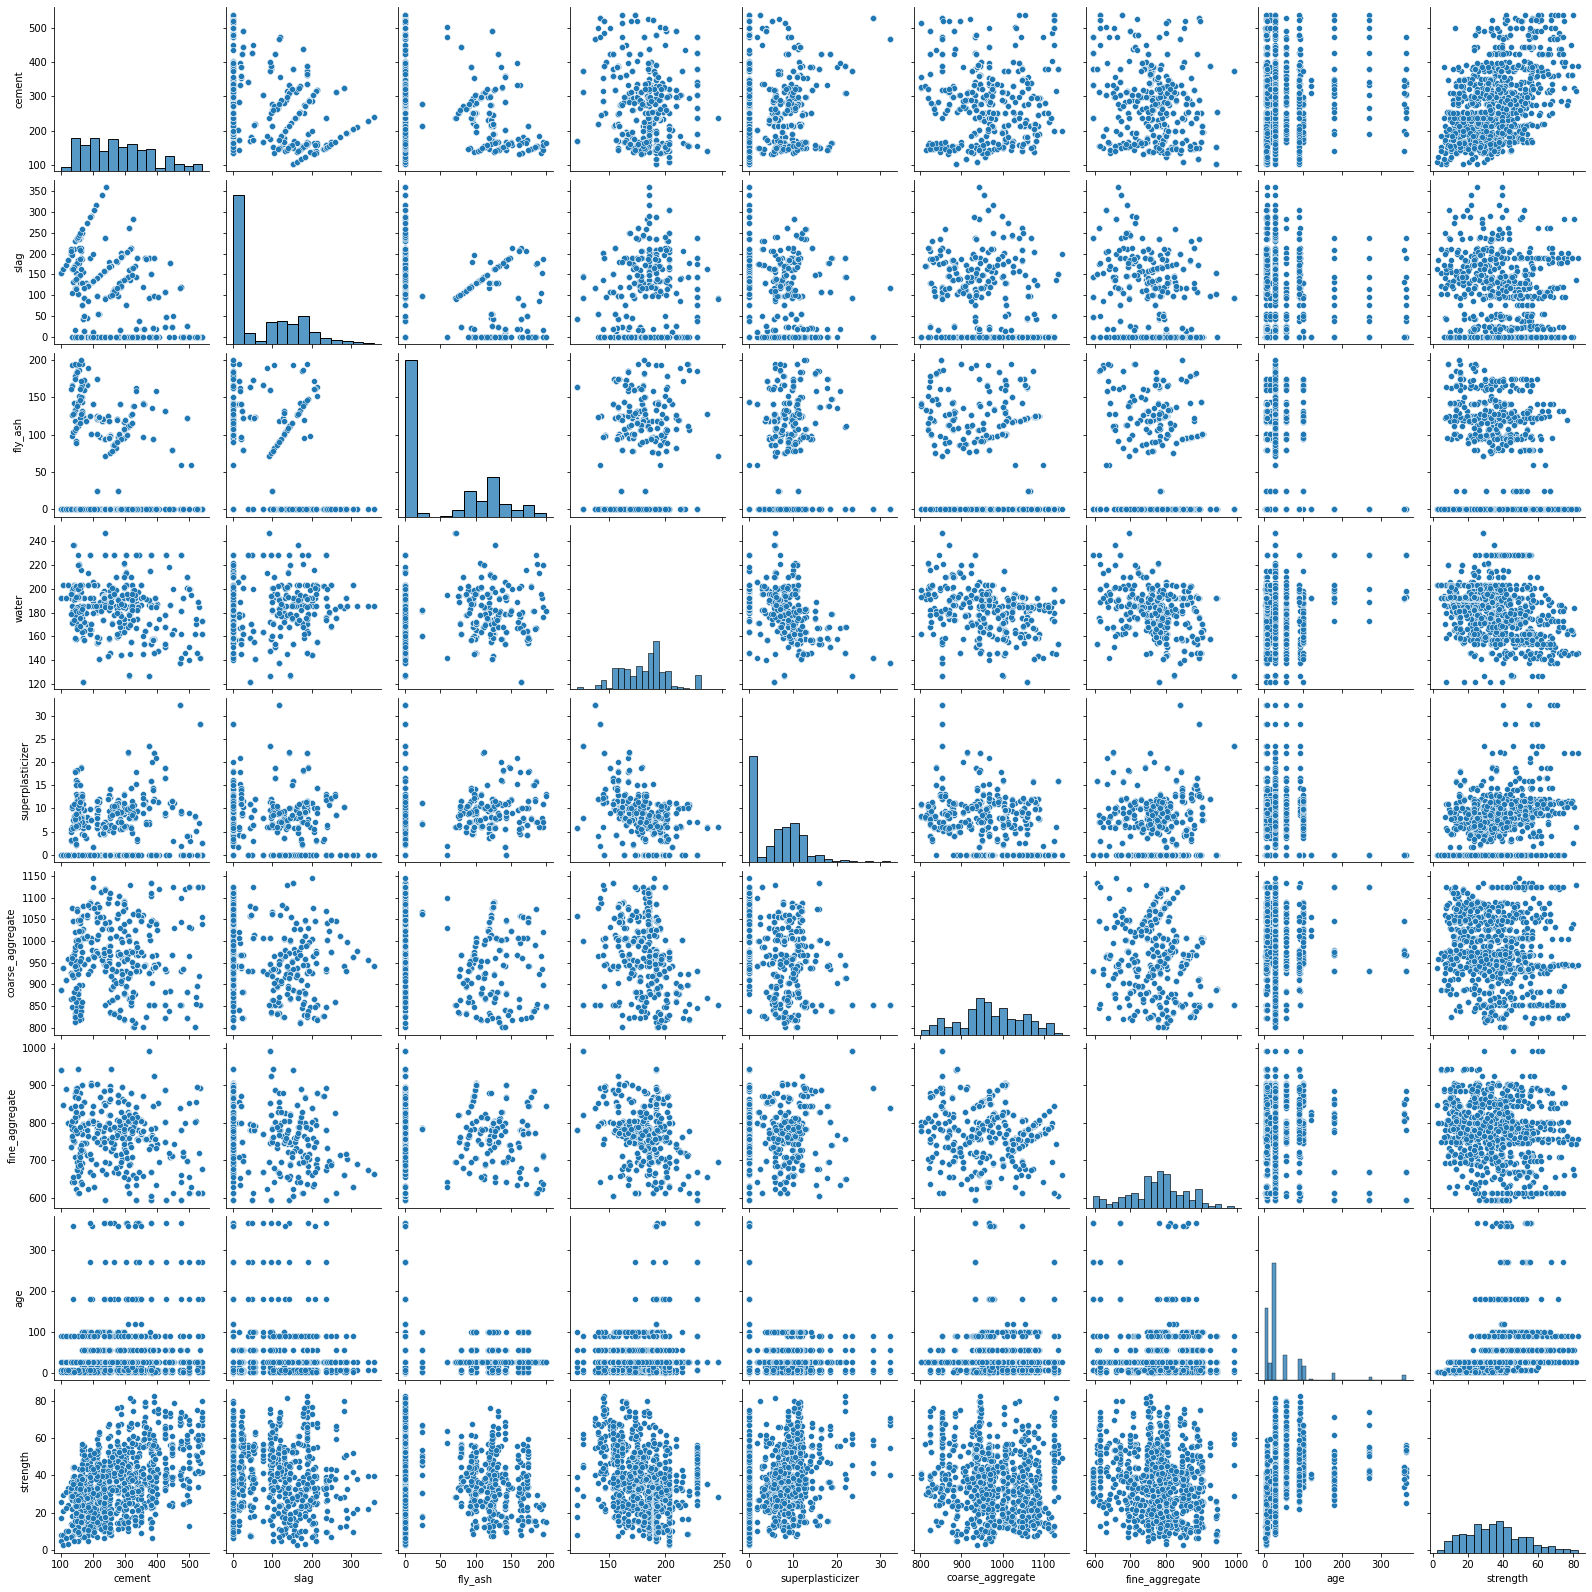

In [10]:
sns.pairplot(df)

# Before removing outliers

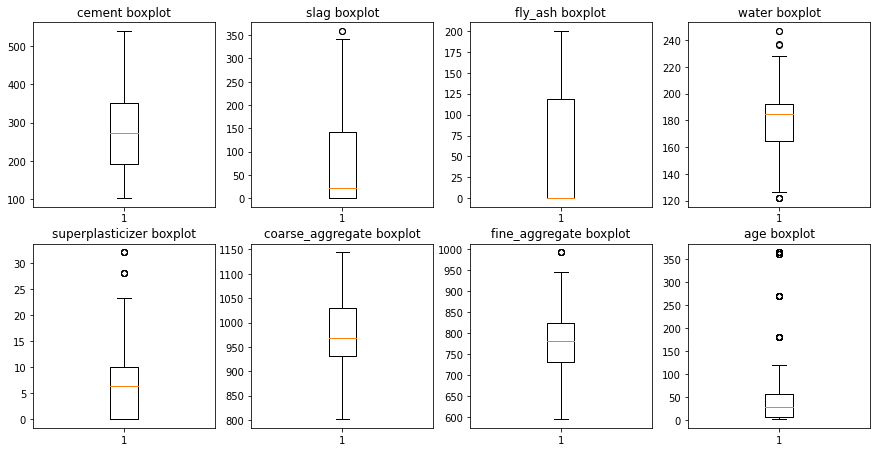

In [11]:
cont_vars = list(df.columns)[:-1]
def outliers_visual(data):
  plt.figure(figsize=(15,40))
  i=0
  for col in cont_vars:
    i +=1 
    plt.subplot(10,4,i)
    plt.boxplot(data[col])
    plt.title('{} boxplot'.format(col))

  plt.show()
outliers_visual(df)

#After removing outliers

In [12]:
df_transformed = df[df['age']<150]
df_transformed.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,278.074871,74.775747,57.479660,179.790268,6.580026,972.969464,777.688414,32.514933,35.310862
std,104.057055,86.747497,64.460922,20.215829,5.947296,78.711589,76.737640,28.616384,16.877112
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.770000,0.000000,931.250000,740.150000,7.000000,22.938867
50%,261.000000,22.000000,0.000000,182.500000,7.000000,968.000000,780.090000,28.000000,33.605060
75%,350.000000,145.000000,118.310000,192.000000,10.400000,1030.500000,825.000000,28.000000,45.532995
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,120.000000,82.599225


In [13]:
df_transformed = df_transformed[df_transformed['superplasticizer']<30]
df_transformed.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,277.086646,74.556159,57.777174,180.007609,6.447417,973.595083,777.363302,32.491718,35.181011
std,103.412395,86.918035,64.494440,20.040317,5.668778,78.431671,76.802532,28.590651,16.803117
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,739.300000,7.000000,22.906116
50%,259.950000,22.000000,0.000000,183.000000,6.930000,968.000000,780.045000,28.000000,33.515921
75%,349.000000,145.000000,118.527500,192.000000,10.370000,1032.500000,824.000000,28.000000,45.303227
max,540.000000,359.400000,200.100000,247.000000,28.200000,1145.000000,992.600000,120.000000,82.599225


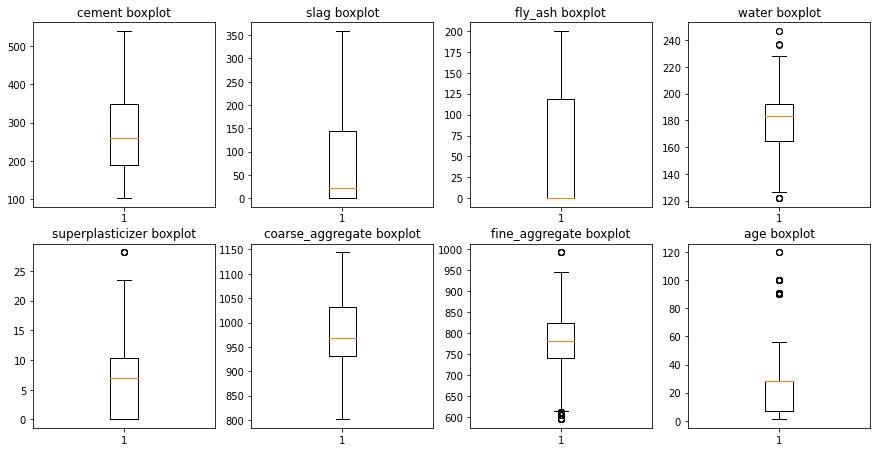

In [14]:
cont_vars = list(df_transformed.columns)[:-1]
outliers_visual(df_transformed)

In [15]:
df_transformed.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,277.086646,74.556159,57.777174,180.007609,6.447417,973.595083,777.363302,32.491718,35.181011
std,103.412395,86.918035,64.494440,20.040317,5.668778,78.431671,76.802532,28.590651,16.803117
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.900000,0.000000,932.000000,739.300000,7.000000,22.906116
50%,259.950000,22.000000,0.000000,183.000000,6.930000,968.000000,780.045000,28.000000,33.515921
75%,349.000000,145.000000,118.527500,192.000000,10.370000,1032.500000,824.000000,28.000000,45.303227
max,540.000000,359.400000,200.100000,247.000000,28.200000,1145.000000,992.600000,120.000000,82.599225


#Pre-Processing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_transformed.drop(['strength'],axis=1)
y = df_transformed['strength']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Model Building

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [20]:
rfr = RandomForestRegressor(ccp_alpha=0.0)
fit_rfr = rfr.fit(X_train,y_train)

#Model Performance

In [21]:
print('score:- ',rfr.score(X_test,y_test))
print('mean squared error:- ',mean_squared_error(y_test,rfr.predict(X_test)))
print('root mean squared error :- ',np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))

score:-  0.8979861673609164
mean squared error:-  23.990699244500874
root mean squared error :-  4.898030139198908


# Model graphical presentation

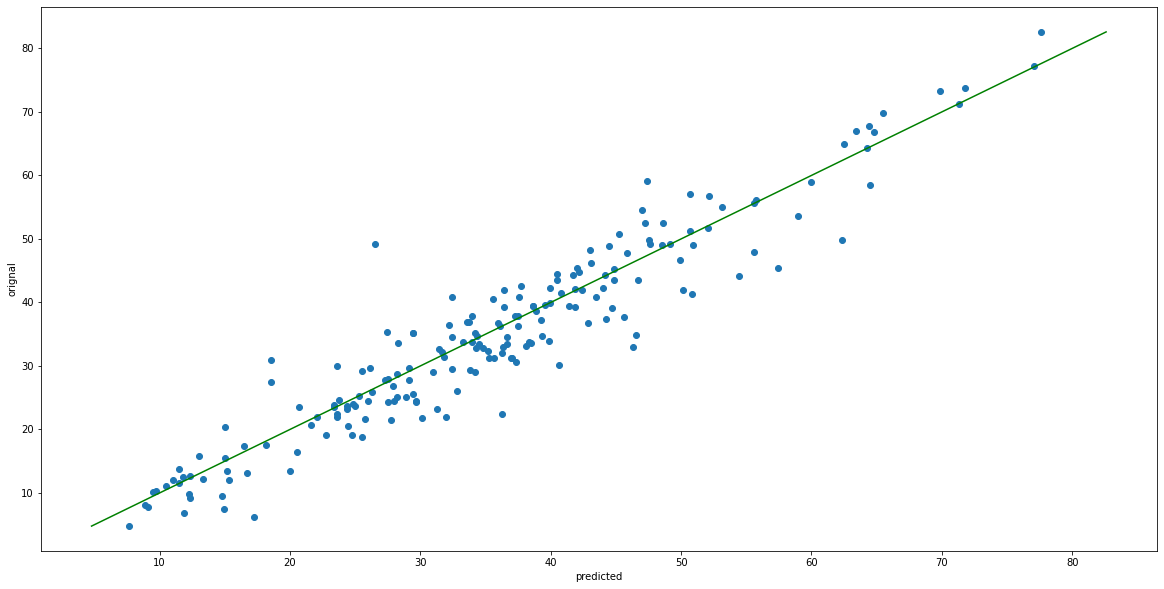

In [22]:
y_predict = rfr.predict(X_test)
plt.figure(figsize=[20,10])
plt.scatter(y_predict,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

#Predictions

In [23]:
X_predict = list(rfr.predict(X_test))
predicted_df = {'predicted_values': X_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
1018,39.234446,37.265488
317,54.475637,44.140254
22,8.888449,8.063422
729,37.286407,37.914285
377,37.480195,36.300911
311,39.923060,39.941345
867,37.521649,37.914285
322,50.184131,42.030457
417,13.341574,12.176146
495,55.612426,47.966845
